# Linear regression exercises

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 0. Simulate phone dataset (*)
a

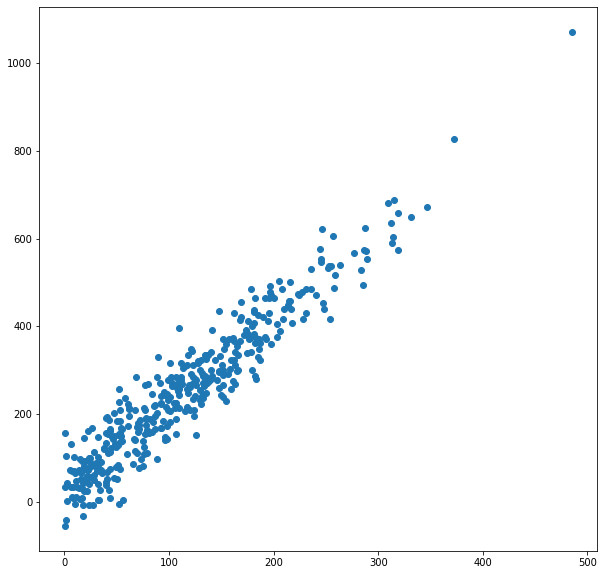

In [151]:

np.random.seed(42)
size = (400, 1)

μ, σ = 100, 100
X =np.abs(np.random.normal(μ, σ, size))

μ_ϵ, σ_ϵ = 0, 50
ϵ = np.random.normal(μ_ϵ, σ_ϵ, size)
y = 2 * X + 25 + ϵ
plt.figure(figsize=(10, 10))
plt.scatter(X, y);

b

In [143]:
xy = np.append(X, y, 1)

xy = np.delete(xy, np.where(xy[:, 1]<0)[0], 0)
xy = np.delete(xy, np.where(xy[:, 0]>=300)[0], 0)


xy.shape

(381, 2)

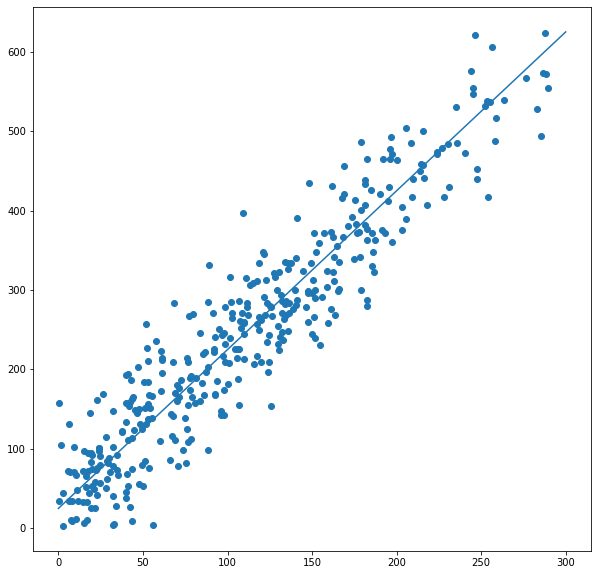

In [150]:
plt.figure(figsize=(10, 10))
plt.scatter(xy[:, 0],xy[:, 1])

x_linje = np.linspace(0, 300)
y_linje = 2 * x + 25
plt.plot(x_linje, y_linje);

In [400]:
df =pd.DataFrame(xy, columns=("Minuter", "Kostnad"))
df.insert(0, "intercept", 1)
df.head()

,intercept,Minuter,Kostnad
0,1,149.671415,244.621448
1,1,86.173570,167.378389
2,1,164.768854,354.799893
3,1,252.302986,531.955001
4,1,76.584663,155.666051


## 1. Train|test split (*)
a


In [398]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float = .7, random_state = 42, replace = False) -> tuple:
    X, y = pd.DataFrame(X), pd.DataFrame(y)
    
    n = int(len(X) * train_fraction)
    
    X_train = X.sample(n=n, random_state=random_state, replace=replace)
    X_test = X.drop(X_train.index)
    
    y_train = y.sample(n=n, random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index)
   
    return (X_train, X_test, y_train, y_test)

In [407]:

(X_train, X_test, y_train, y_test) = train_test_split(df[["intercept", "Minuter"]], df["Kostnad"] )

In [408]:
# Dubletter
X_train.index.isin(X_test.index).sum(), y_train.index.isin(y_test.index).sum() 

(0, 0)

In [409]:
# Saknade index
len(xy), len(X_train), len(X_test)


(381, 266, 115)

## 2. Simple linear regression with normal equation (*)

In [410]:
X_tr, y_tr = X_train.to_numpy(), y_train.to_numpy()

β_hat = np.linalg.inv(X_tr.T @ X_tr) @ X_tr.T @ y_tr
β_hat

array([[32.22147722],
       [ 1.91050591]])

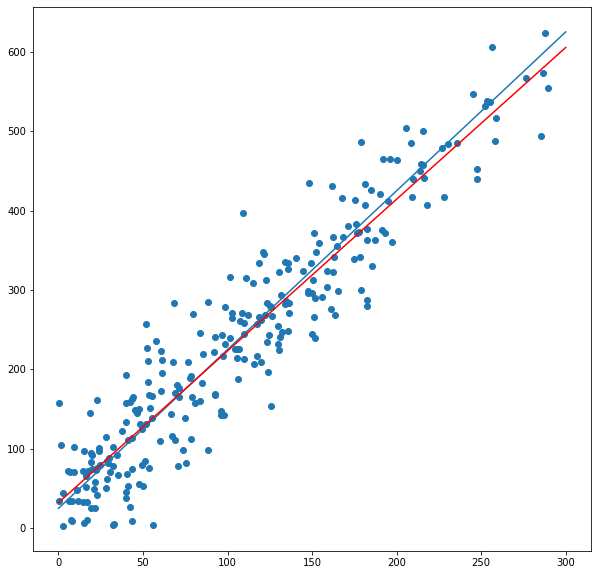

In [411]:
y_hat = np.append((1+0*x_linje.reshape(50,1)), x_linje.reshape(50,1), 1) @ β_hat

plt.figure(figsize=(10, 10))
plt.scatter(X_tr[:, 1], y_tr)
plt.plot(x_linje, y_linje)
plt.plot(x_linje, y_hat, "r");



## 3. Prediction and evaluation (*)
a

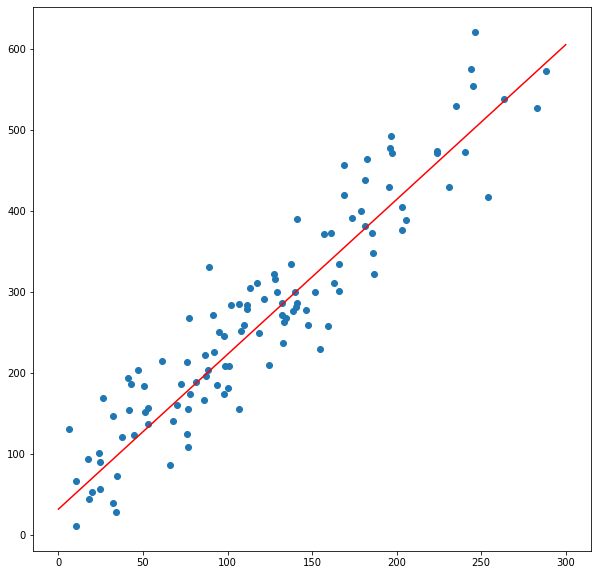

In [412]:
X_te, y_te = X_test.to_numpy(), y_test.to_numpy()

plt.figure(figsize=(10, 10))
plt.scatter(X_te[:, 1], y_te)

plt.plot(x_linje, y_hat, "r");

b

In [413]:
y_hat_test = X_te @ β_hat

#MAE
MAE =  1/len(X_te) * np.abs(y_te-y_hat_test).sum() 
MAE

40.12002651149212

In [414]:
#MSE
MSE =  1/len(X_te) * np.square(y_te-y_hat_test).sum() 
MSE

2401.5771288677274

In [415]:
#RMSE
RMSE = np.sqrt(MSE)
RMSE

49.00588871623213

## 4. Simulate more explanatory variables (*)
a

In [437]:
np.random.seed(42)
size = 10000
β = [25, 2, 0.5, 50]

intercept = np.ones(size)

X1 =np.abs(np.random.normal(100, 100, size))

X2 = np.random.randint(0, 50, size)

X3 =np.abs(np.random.normal(0, 2, size))

ϵ = np.random.normal(0, 50, size)

y = np.column_stack([intercept, X1, X2, X3]) @ β + ϵ

In [438]:
d ={ "I" : intercept, "X1" : X1, "X2" : X2, "X3" : X3, "y" : y}

df2 = pd.DataFrame(d)
df2

,I,X1,X2,X3,y
0,1.0,149.671415,41,2.263011,502.396003
1,1.0,86.173570,16,0.031570,179.072107
2,1.0,164.768854,30,0.808925,430.008213
3,1.0,252.302986,33,2.625826,647.244277
4,1.0,76.584663,37,3.388079,398.016588
...,...,...,...,...,...
9995,1.0,230.110206,36,0.611639,473.661741
9996,1.0,99.834497,18,1.328020,298.342321
9997,1.0,29.468328,19,2.811456,252.973057
9998,1.0,149.576557,31,3.439294,536.176482


b

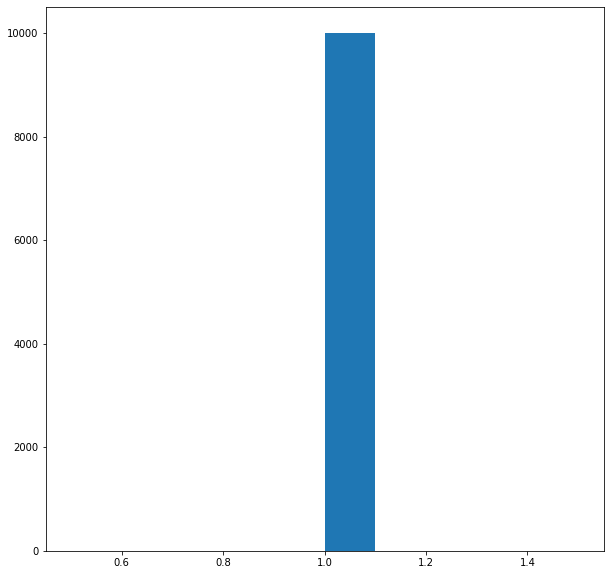

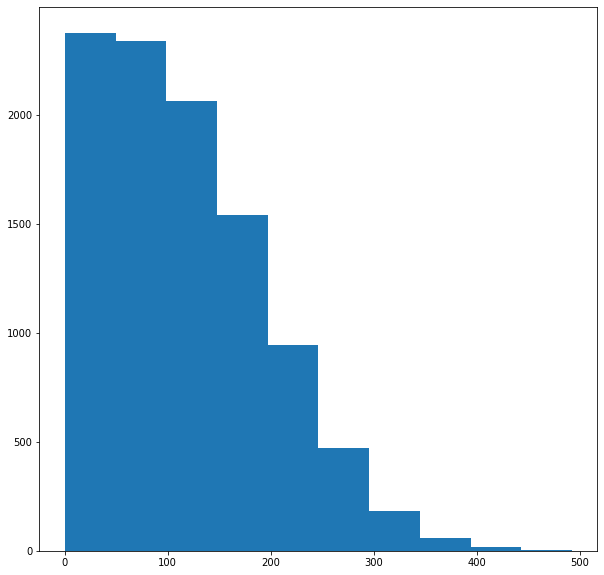

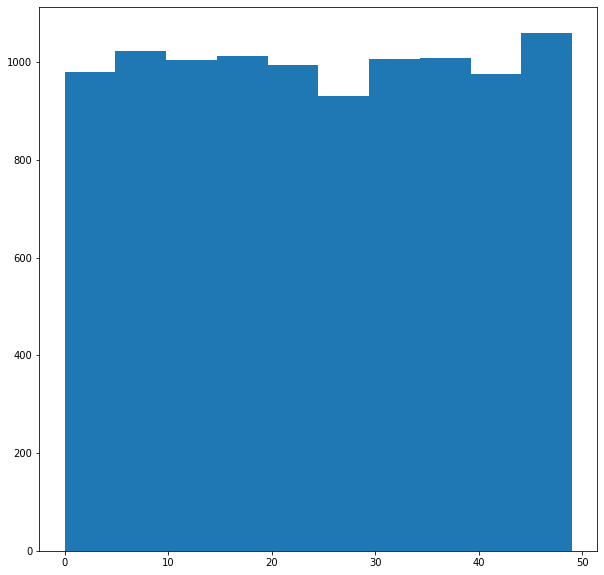

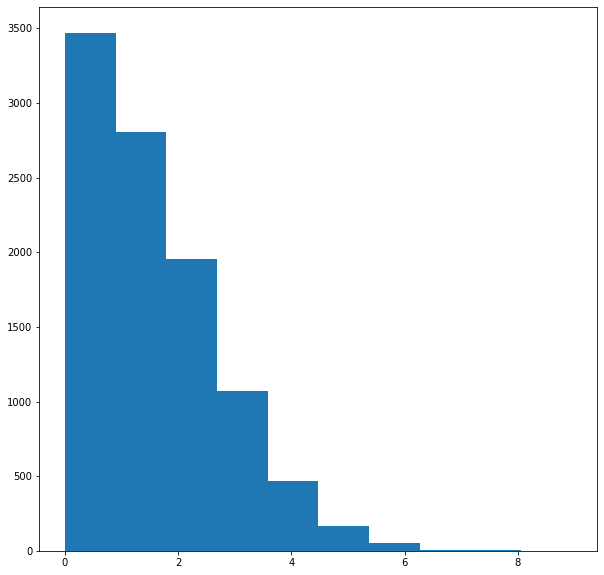

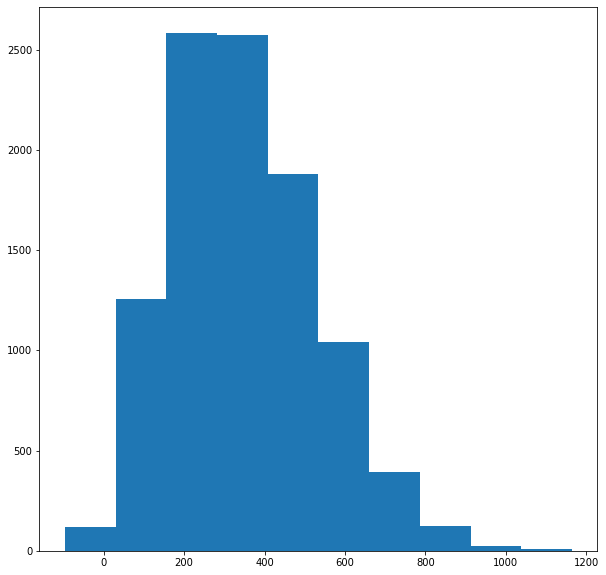

In [439]:

#fig, ax = plt.subplots(1, 4)
for c in df2:
    plt.figure(figsize=(10, 10))
    plt.hist(df2[c])
    

c

In [440]:
df2.query("X3 < 4", inplace=True) 
df2.query("X1 < 300", inplace=True) 
df2.query("y > 0", inplace=True) 

In [441]:
df2

,I,X1,X2,X3,y
0,1.0,149.671415,41,2.263011,502.396003
1,1.0,86.173570,16,0.031570,179.072107
2,1.0,164.768854,30,0.808925,430.008213
3,1.0,252.302986,33,2.625826,647.244277
4,1.0,76.584663,37,3.388079,398.016588
...,...,...,...,...,...
9995,1.0,230.110206,36,0.611639,473.661741
9996,1.0,99.834497,18,1.328020,298.342321
9997,1.0,29.468328,19,2.811456,252.973057
9998,1.0,149.576557,31,3.439294,536.176482


d

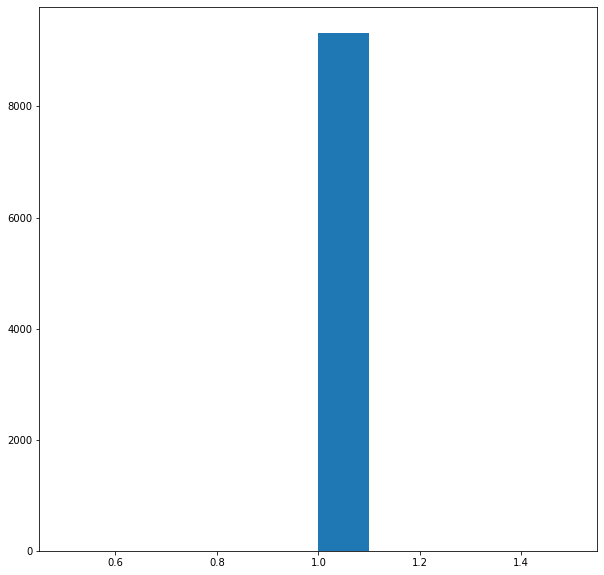

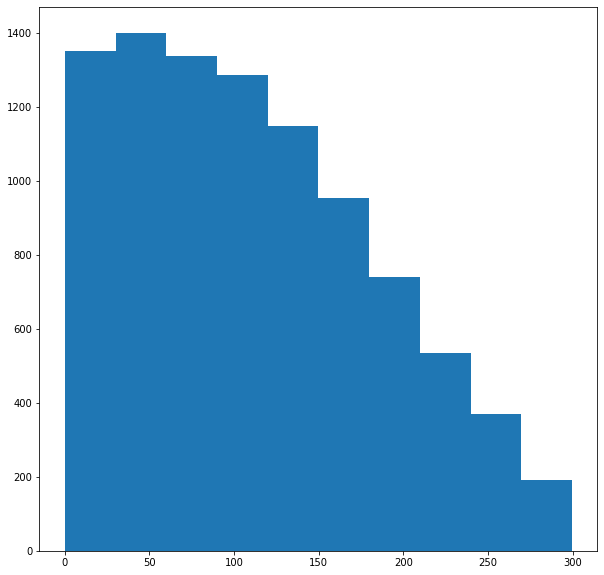

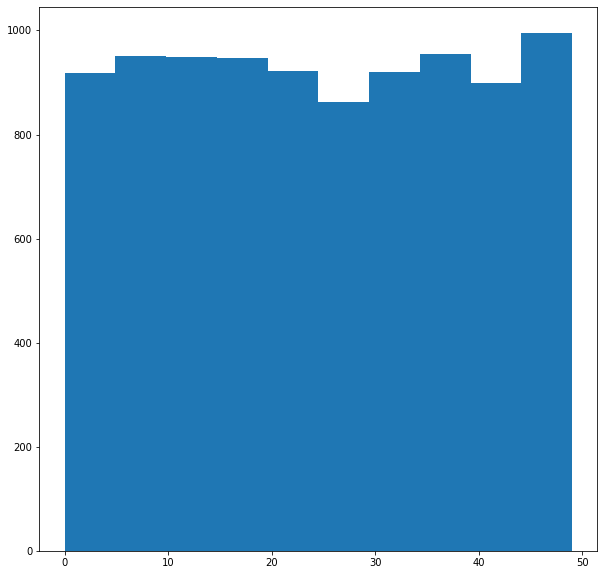

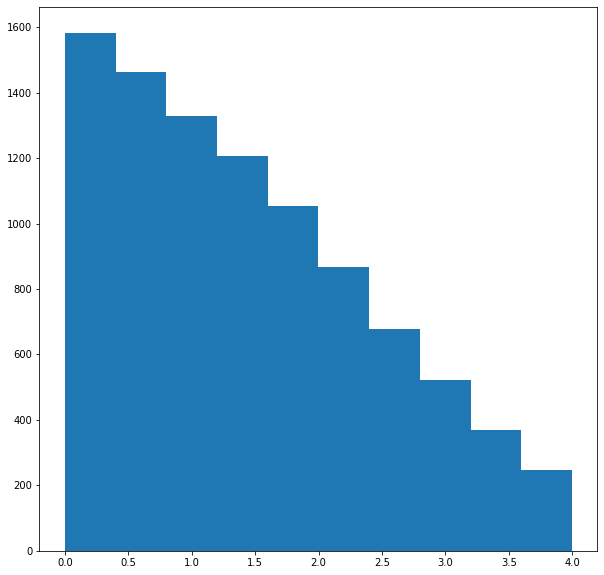

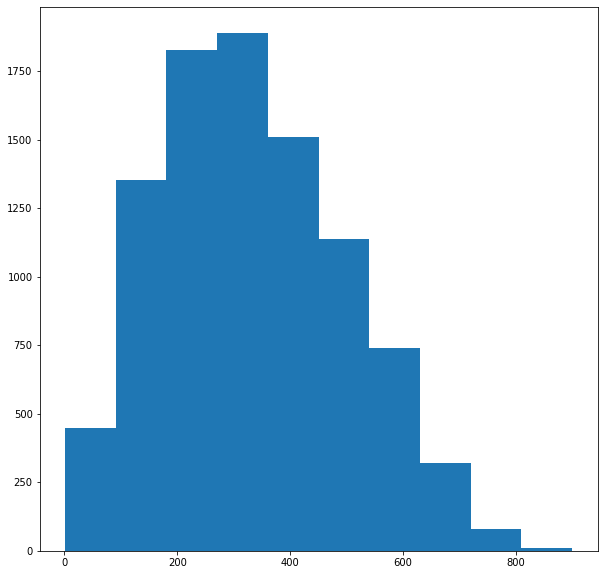

In [442]:
for c in df2:
    plt.figure(figsize=(10, 10))
    plt.hist(df2[c])

## 5. Multiple linear regression (*)
a

In [443]:
(X_train, X_test, y_train, y_test) = train_test_split(df2.iloc[:, 0:-1], df2["y"], train_fraction = 0.8 )


b

In [444]:
X_tr, y_tr = X_train.to_numpy(), y_train.to_numpy()

β_hat = np.linalg.inv(X_tr.T @ X_tr) @ X_tr.T @ y_tr
β_hat

array([[26.50951697],
       [ 1.99511925],
       [ 0.52472029],
       [48.97164497]])

c

In [445]:
X_te, y_te = X_test.to_numpy(), y_test.to_numpy()

y_hat_test = X_te @ β_hat

#MAE
MAE =  1/len(X_te) * np.abs(y_te-y_hat_test).sum() 
MAE


39.23771155971602

In [446]:
#MSE
MSE =  1/len(X_te) * np.square(y_te-y_hat_test).sum() 
MSE

2421.26147651613

In [447]:
#RMSE
RMSE = np.sqrt(MSE)
RMSE


49.20631541292368

d

In [458]:
RMSE =[]
sample_sizes = (10, 100, 1000, 10000, 100000, 1000000)

for size in sample_sizes:
    np.random.seed(42)

    β = [25, 2, 0.5, 50]

    intercept = np.ones(size)

    X1 =np.abs(np.random.normal(100, 100, size))

    X2 = np.random.randint(0, 50, size)

    X3 =np.abs(np.random.normal(0, 2, size))

    ϵ = np.random.normal(0, 50, size)

    y = np.column_stack([intercept, X1, X2, X3]) @ β + ϵ

    d ={ "I" : intercept, "X1" : X1, "X2" : X2, "X3" : X3, "y" : y}

    df2 = pd.DataFrame(d)

    df2.query("X3 < 4", inplace=True) 
    df2.query("X1 < 300", inplace=True) 
    df2.query("y > 0", inplace=True) 

    (X_train, X_test, y_train, y_test) = train_test_split(df2.iloc[:, 0:-1], df2["y"], train_fraction = 0.8 )

    X_tr, y_tr = X_train.to_numpy(), y_train.to_numpy()
    X_te, y_te = X_test.to_numpy(), y_test.to_numpy()

    β_hat = np.linalg.inv(X_tr.T @ X_tr) @ X_tr.T @ y_tr
    
    y_hat_test = X_te @ β_hat

    MSE =  1/len(X_te) * np.square(y_te-y_hat_test).sum() 

    RMSE.append(np.sqrt(MSE))



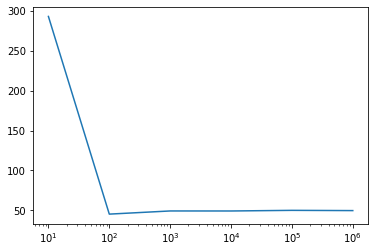

In [465]:
plt.plot(sample_sizes, RMSE,)
plt.xscale("log")